<a href="https://colab.research.google.com/github/mshapna/EDA_Timeseries/blob/Version1/EDA_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load and inspect your dataset
file_path = 'threeyears.csv'
df = pd.read_csv(file_path)
# Display the column names in the DataFrame
print(df.columns)
df.head()

Index(['DateTime', 'RH', 'Temperature', 'Index'], dtype='object')


,DateTime,RH,Temperature,Index
0,1/1/2021 0:00,18.60,21.26,Dry
1,1/1/2021 1:00,18.60,21.20,Dry
2,1/1/2021 2:00,18.49,21.17,Dry
3,1/1/2021 3:00,18.39,21.10,Dry
4,1/1/2021 4:00,18.35,21.04,Dry


In [3]:
df = pd.read_csv('threeyears.csv', parse_dates=['DateTime'], index_col="DateTime")
df.head()

,RH,Temperature,Index
DateTime,,,
2021-01-01 00:00:00,18.60,21.26,Dry
2021-01-01 01:00:00,18.60,21.20,Dry
2021-01-01 02:00:00,18.49,21.17,Dry
2021-01-01 03:00:00,18.39,21.10,Dry
2021-01-01 04:00:00,18.35,21.04,Dry


In [26]:
# Step 3: Extract time features
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek

# Handling DateTime as a Timestamp
df['Timestamp'] = df.index.astype(int) / 10**9

# Step 6: Categorical encoding
ordinal_mapping = {'Comfortable': 0, 'Uncomfortable': 1, 'Dry': 2, 'Humid': 3, 'Hot': 4, 'Cold': 5}
df['Index_encoded'] = df['Index'].map(ordinal_mapping)


In [27]:
print(df.columns)

Index(['RH', 'Temperature', 'Index', 'Hour', 'Day', 'Month', 'DayOfWeek',
       'Timestamp', 'Index_encoded', 'Year'],
      dtype='object')



# Exploratory Data Analysis (EDA) for time-series analysis
Histograms and distribution plots play a crucial role in data analysis and visualization by providing a visual representation of the distribution of a dataset. They aid in exploring underlying patterns, central tendencies, and variability, offering insights into the concentration of data within specific ranges. Histograms help identify the central tendency, spread, and outliers in the data, making them valuable for outlier detection and comparison of distributions. Additionally, they assist in assessing skewness, kurtosis, and normality of a distribution. Distribution plots, such as kernel density plots, complement histograms by offering smooth representations of data distribution. Together, these tools are essential for exploratory data analysis, aiding in data preprocessing decisions and effectively communicating insights to diverse audiences.

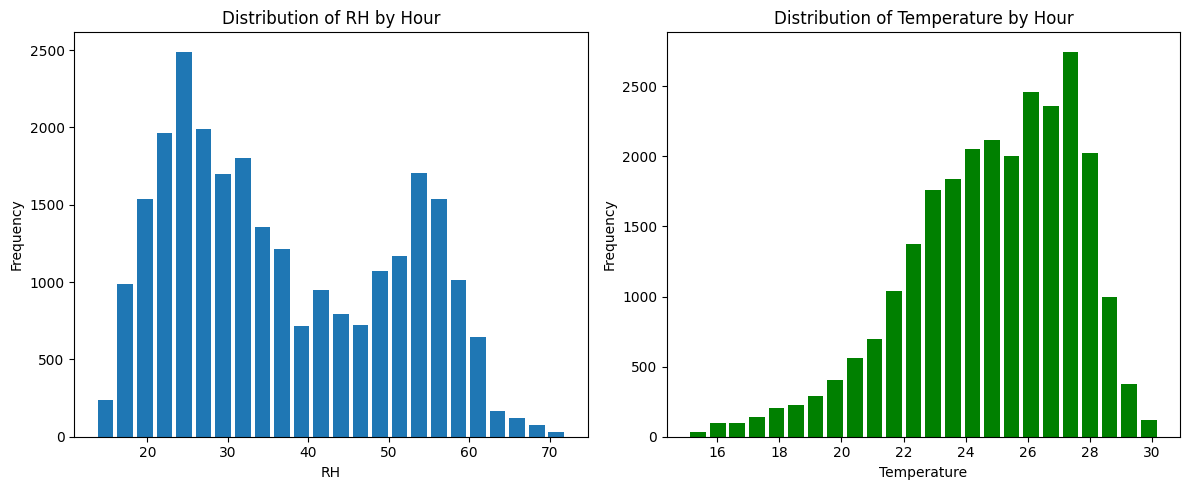

In [5]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 2: Distribution of RH by Hour
axes[0].hist(df['RH'], bins=24, histtype='bar', rwidth=0.8)
axes[0].set_xlabel('RH')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of RH by Hour')

# Plot 4: Distribution of Temperature by Hour (color set to green)
axes[1].hist(df['Temperature'], bins=24, histtype='bar', rwidth=0.8, color='green')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Temperature by Hour')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



**Distribution of RH by Hour:**
The first plot (top-right) represents the distribution of RH values across different hours of the day.
Each bar in the histogram corresponds to the frequency of RH values during a specific hour. It helps to understand how RH varies throughout the day.
In this plot we can observe the values of RH and their frequency of occurance over a time period.

**Distribution of Temperature by Hour:**
The second plot (bottom-right) illustrates the distribution of temperature values across different hours of the day.
Each bar in the histogram represents the frequency of temperature values during a specific hour.

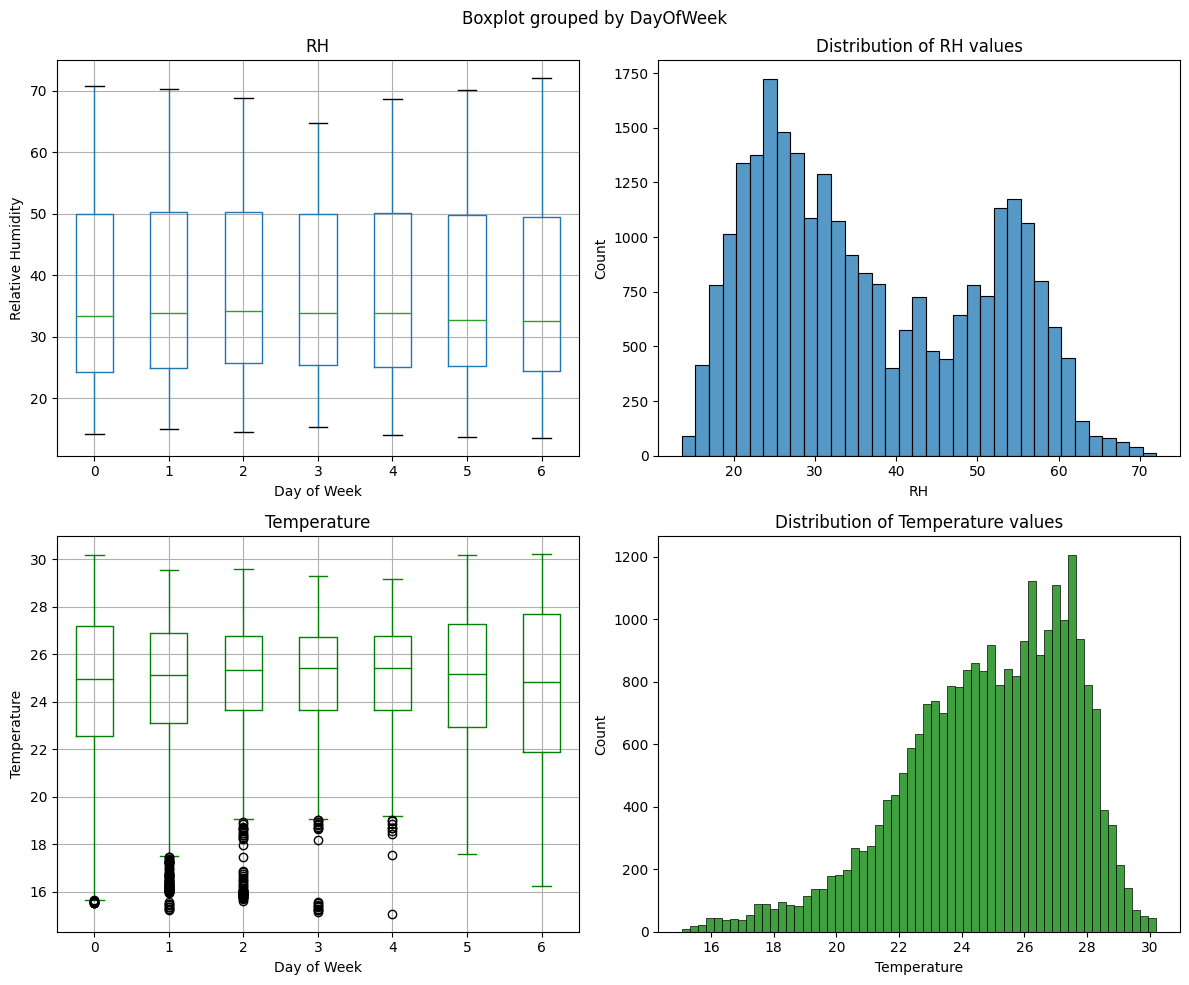

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Relative Humidity by Day of Week
df.boxplot(column='RH', by='DayOfWeek', ax=axes[0, 0])
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Relative Humidity')

# Plot 2: Distribution of RH values using seaborn
sns.histplot(x="RH", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of RH values')

# Plot 3: Temperature by Day of Week (color set to green)
df.boxplot(column='Temperature', by='DayOfWeek', ax=axes[1, 0], color='green')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Temperature')

# Plot 4: Distribution of Temperature values using seaborn (color set to green)
sns.histplot(x="Temperature", data=df, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribution of Temperature values')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



From the provided plots, we can gather insights into the distribution and variation of Relative Humidity (RH) and Temperature across different days of the week. The first subplot (Plot 1) illustrates boxplots for RH, displaying the median, quartiles, and potential outliers for each day of the week. This allows us to observe any day-wise patterns or variations in RH levels.

The second subplot (Plot 2) shows the distribution of RH values using a histogram, providing a visual representation of the frequency or density of RH values. Peaks and patterns in the histogram can indicate the prevalence of certain RH ranges.

Moving to temperature-related plots, the third subplot (Plot 3) presents boxplots for Temperature, with the color set to green for visual distinction. Similar to Plot 1, this allows for the examination of temperature variations across different days of the week.

Finally, the fourth subplot (Plot 4) visualizes the distribution of Temperature values using a histogram, again with the color set to green. This provides an additional perspective on the spread and frequency of temperature values.

In summary, these plots offer a comprehensive view of the RH and Temperature dynamics throughout the week, helping identify any day-specific trends, central tendencies, and potential outliers in the dataset. The color distinction in temperature-related plots aids in easy differentiation between RH and Temperature visualizations.

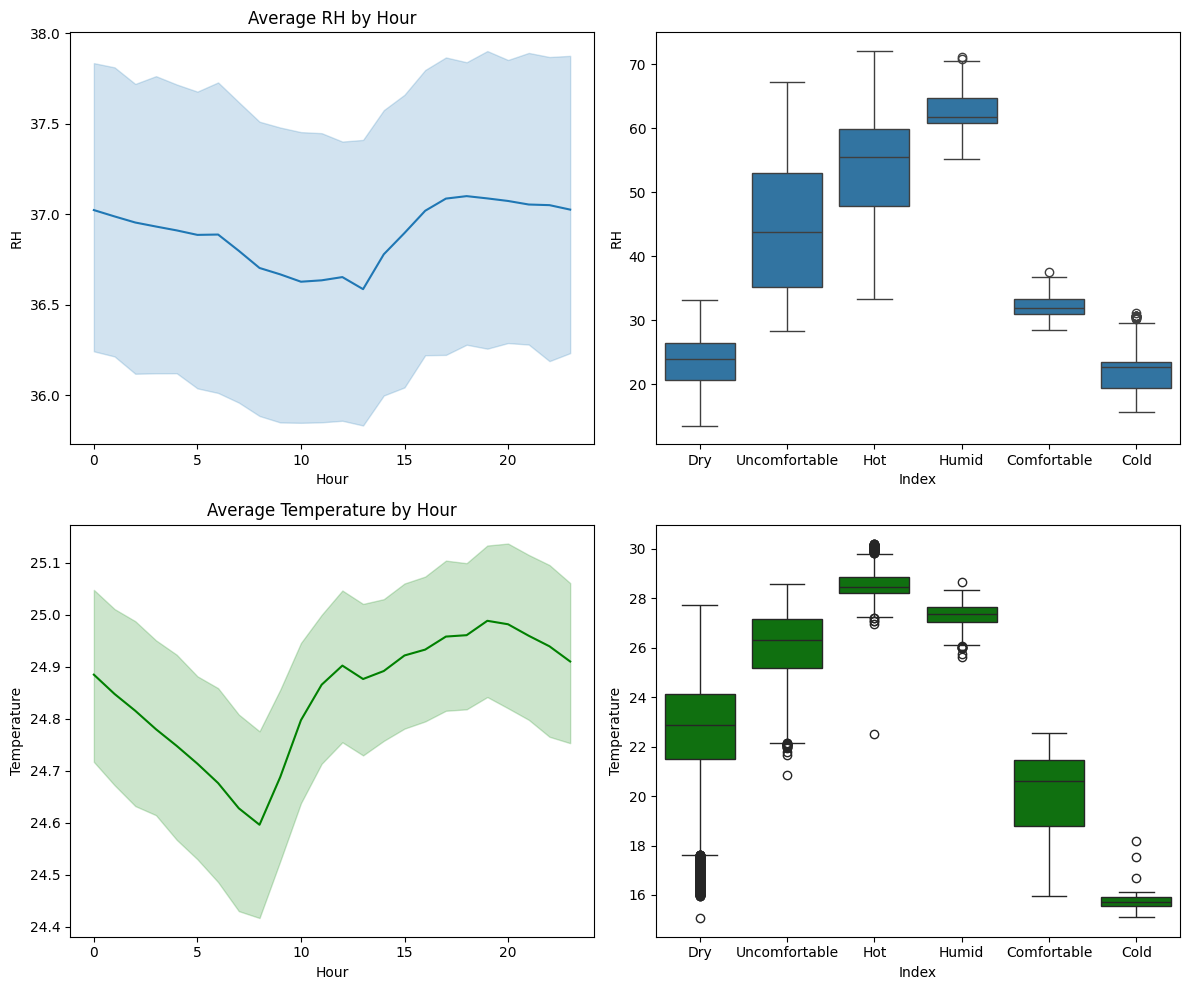

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Average RH by Hour
sns.lineplot(data=df, x="Hour", y="RH", estimator="mean", ax=axes[0, 0])
axes[0, 0].set_title('Average RH by Hour')

# Plot 2: RH distribution by Index
sns.boxplot(x='Index', y='RH', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('RH')

# Plot 3: Average Temperature by Hour (color set to green)
sns.lineplot(data=df, x="Hour", y="Temperature", estimator="mean", ax=axes[1, 0], color='green')
axes[1, 0].set_title('Average Temperature by Hour')

# Plot 4: Temperature distribution by Index (color set to green)
sns.boxplot(x='Index', y='Temperature', data=df, ax=axes[1, 1], color='green')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Temperature')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



From the provided plots, we can gain insights into the average variations and distributions of Relative Humidity (RH) and Temperature across different hours of the day, with an additional focus on their distributions concerning specific indices.

Average RH by Hour (Plot 1): This plot shows the average RH over different hours of the day. Patterns or trends in the lineplot can reveal hourly variations in RH, providing information about the times of the day when RH tends to be higher or lower on average.

RH Distribution by Index (Plot 2): The boxplot displays the distribution of RH values for different indices. It allows us to compare the spread and central tendencies of RH across various categories (indices). Outliers or variations in the boxplots can indicate differences in RH levels among different index categories.

Average Temperature by Hour (Plot 3): Similar to Plot 1, this plot focuses on the average Temperature across different hours of the day. The color set to green distinguishes this plot from the RH-related plots, making it easy to differentiate between RH and Temperature visualizations. Patterns in the lineplot can provide insights into the hourly variations in Temperature.

Temperature Distribution by Index (Plot 4): This boxplot illustrates the distribution of Temperature values for different indices, similar to Plot 2. The color set to green helps distinguish this plot as temperature-related. Variations in boxplots can highlight differences in temperature levels among various index categories.

In summary, these plots offer a detailed exploration of the average behavior and distribution patterns of RH and Temperature throughout the day and across different indices. The color distinctions aid in clear visualization, making it easier to interpret the information conveyed by each plot.

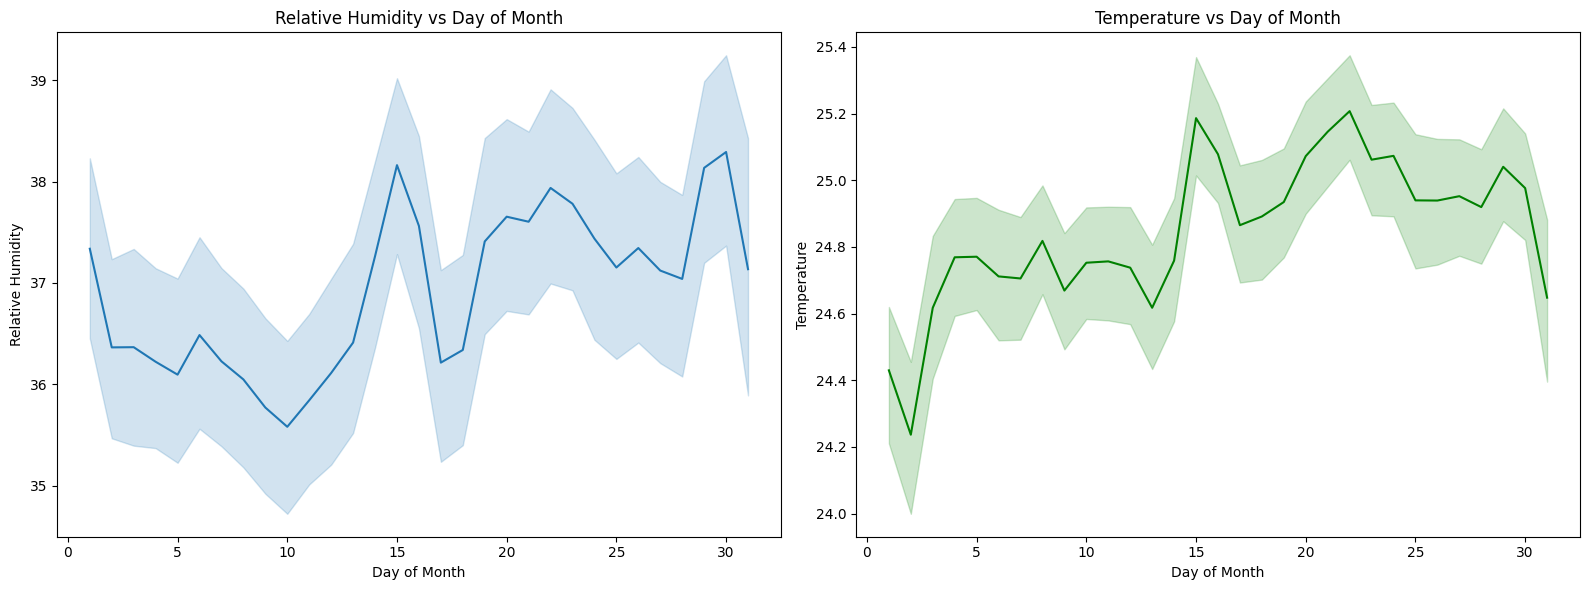

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot RH vs Day of Month
sns.lineplot(data=df, x='Day', y='RH', ax=axes[0])
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title('Relative Humidity vs Day of Month')

# Plot Temperature vs Day of Month
sns.lineplot(data=df, x='Day', y='Temperature', ax=axes[1], color='green')
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Temperature vs Day of Month')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



The code generates a subplot with two panels to visualize the trends of Relative Humidity (RH) and Temperature over the days of the month. The left panel displays a line plot showing the variations in RH across the days, allowing for the identification of patterns or cycles in humidity levels. The right panel features a line plot depicting the changes in Temperature over the days, enabling the observation of trends and fluctuations in temperature values. These plots collectively provide insights into the temporal patterns of RH and Temperature, facilitating the identification of potential correlations and variations in these meteorological parameters throughout the month.

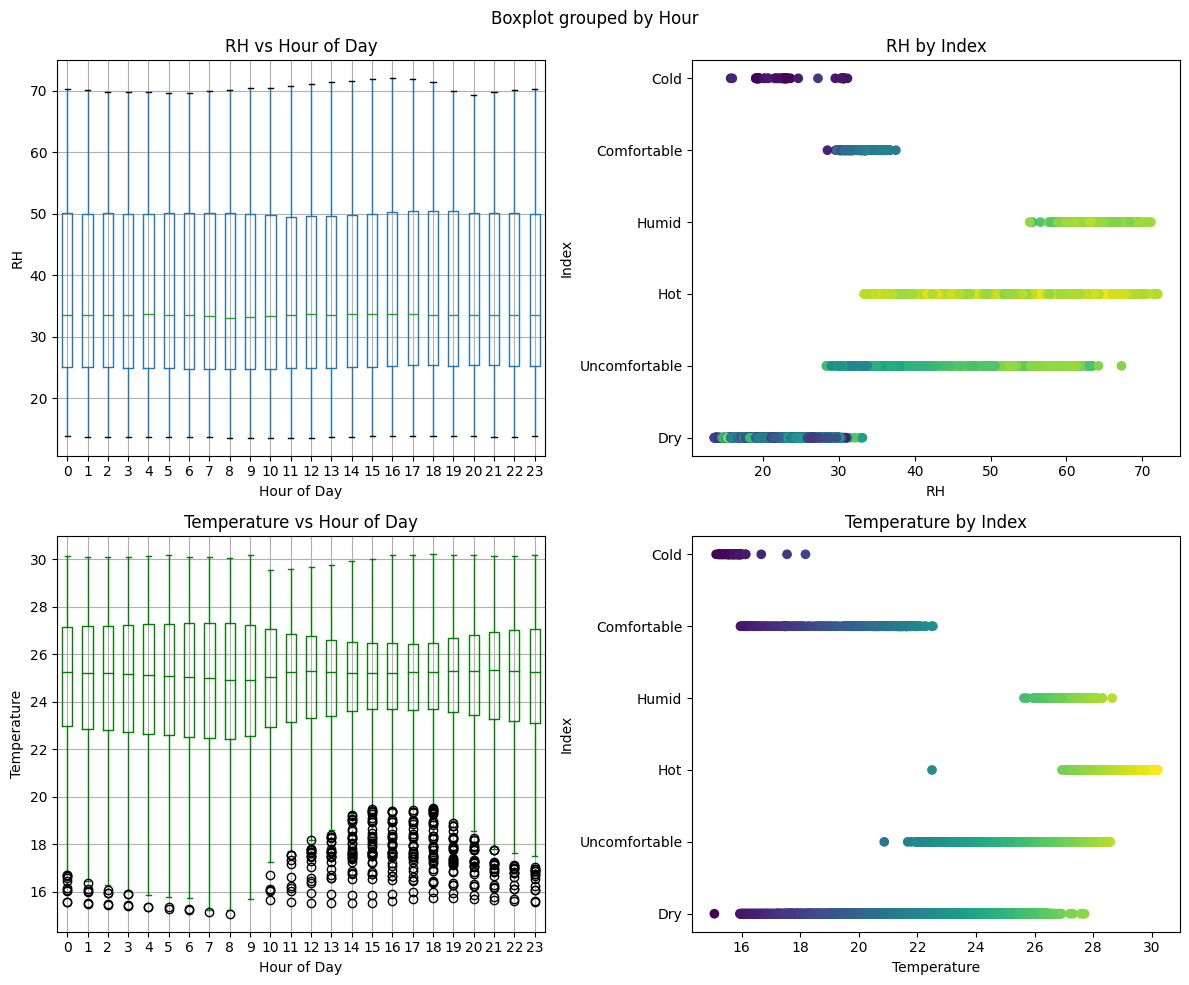

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: RH vs Hour of Day
df.boxplot('RH', by='Hour', ax=axes[0, 0])
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('RH')
axes[0, 0].set_title('RH vs Hour of Day')

# Plot 2: RH by Index
axes[0, 1].scatter(df['RH'], df['Index'], c=df['Temperature'])
axes[0, 1].set_xlabel('RH')
axes[0, 1].set_ylabel('Index')
axes[0, 1].set_title('RH by Index')

# Plot 3: Temperature vs Hour of Day
df.boxplot('Temperature', by='Hour', ax=axes[1, 0],  color='green')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Temperature')
axes[1, 0].set_title('Temperature vs Hour of Day')

# Plot 4: Temperature by Index
axes[1, 1].scatter(df['Temperature'], df['Index'], c=df['Temperature'])
axes[1, 1].set_xlabel('Temperature')
axes[1, 1].set_ylabel('Index')
axes[1, 1].set_title('Temperature by Index')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



The provided code creates a subplot with four panels, each visualizing different aspects of the relationships between Relative Humidity (RH), Temperature, Hour of Day, and Index. In the first panel (top-left), a boxplot illustrates the distribution of RH values across different hours of the day, providing insights into the diurnal variations in humidity levels. The second panel (top-right) utilizes a scatter plot to showcase the relationship between RH and Index, with the color indicating the corresponding Temperature values. This allows for the observation of potential patterns or correlations between RH, Index, and Temperature. In the third panel (bottom-left), another boxplot displays the distribution of Temperature values across different hours of the day, enabling the examination of temperature fluctuations throughout the day. The fourth panel (bottom-right) presents a scatter plot illustrating the relationship between Temperature and Index, with color coding based on Temperature values. Overall, these visualizations offer a comprehensive understanding of the interplay between RH, Temperature, time of day, and Index, aiding in the identification of patterns and trends in the dataset.

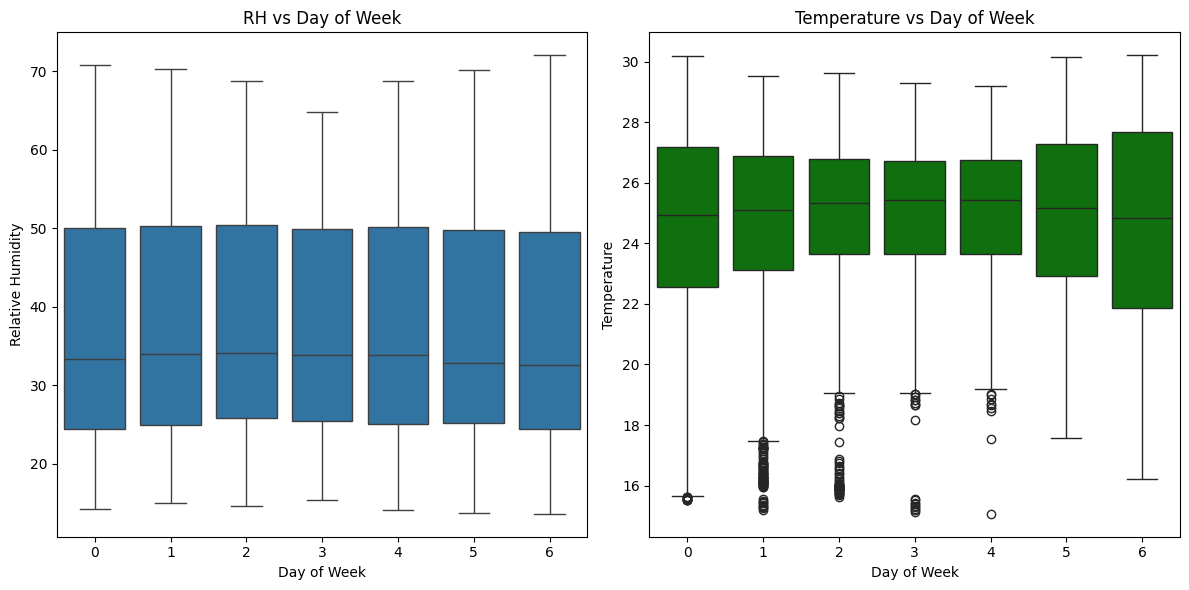

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot of RH vs Day of Week
sns.boxplot(data=df, x="DayOfWeek", y="RH", ax=axes[0])
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title('RH vs Day of Week')

# Boxplot of Temperature vs Day of Week
sns.boxplot(data=df, x="DayOfWeek", y="Temperature", ax=axes[1], color='green')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Temperature vs Day of Week')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



The provided code generates a subplot with two panels, each displaying a boxplot to visualize the distribution of Relative Humidity (RH) and Temperature across different days of the week. In the first panel (left), the boxplot illustrates the variation in RH values for each day of the week, providing insights into the weekly patterns or differences in humidity levels. The second panel (right) similarly uses a boxplot to represent the distribution of Temperature values across different days of the week, allowing for the examination of weekly temperature trends. By comparing the two boxplots, one can identify any recurring patterns or variations in RH and Temperature with respect to the days of the week. This visualization aids in understanding the weekly dynamics of RH and Temperature in the dataset.

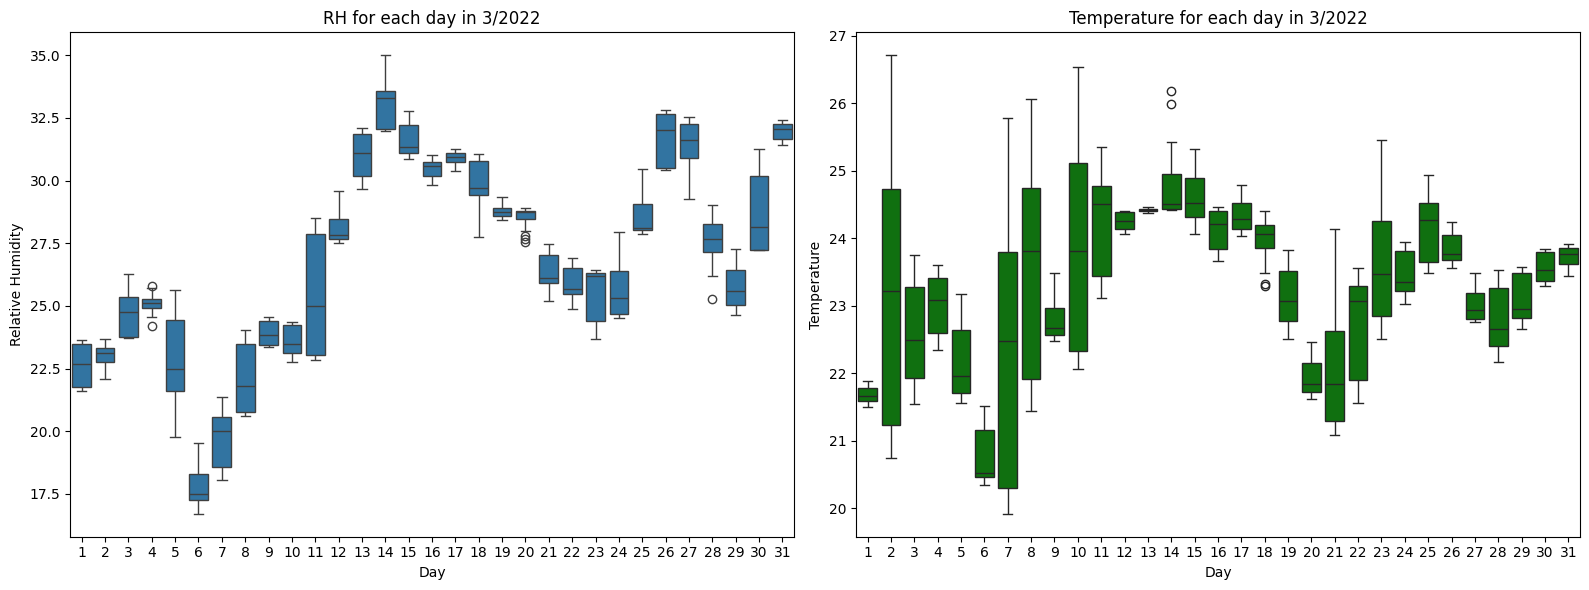

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Assuming your date column is named 'Timestamp' and is now in datetime format
# You can adjust the month and year accordingly
target_month = 3  # Specify the target month
target_year = 2022  # Specify the target year

# Filter the data for the target month and year
target_month_data = df[(df['Timestamp'].dt.month == target_month) & (df['Timestamp'].dt.year == target_year)]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Boxplot for Relative Humidity (RH)
sns.boxplot(data=target_month_data, x="Day", y="RH", ax=axes[0])
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title(f'RH for each day in {target_month}/{target_year}')

# Boxplot for Temperature
sns.boxplot(data=target_month_data, x="Day", y="Temperature", ax=axes[1], color='green')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Temperature')
axes[1].set_title(f'Temperature for each day in {target_month}/{target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()




The provided code generates a subplot with two panels, each displaying a boxplot to visualize the distribution of Relative Humidity (RH) and Temperature for each day in a specified month and year. In the first panel (left), the boxplot illustrates the variation in RH values for each day of the specified month and year, providing insights into the daily patterns or differences in humidity levels during that period. The second panel (right) similarly uses a boxplot to represent the distribution of Temperature values for each day, allowing for the examination of daily temperature trends in the specified month and year. By comparing the two boxplots, one can identify any recurring patterns or variations in RH and Temperature within the selected time frame. This visualization aids in understanding the daily dynamics of RH and Temperature during the specified month and year in the dataset.

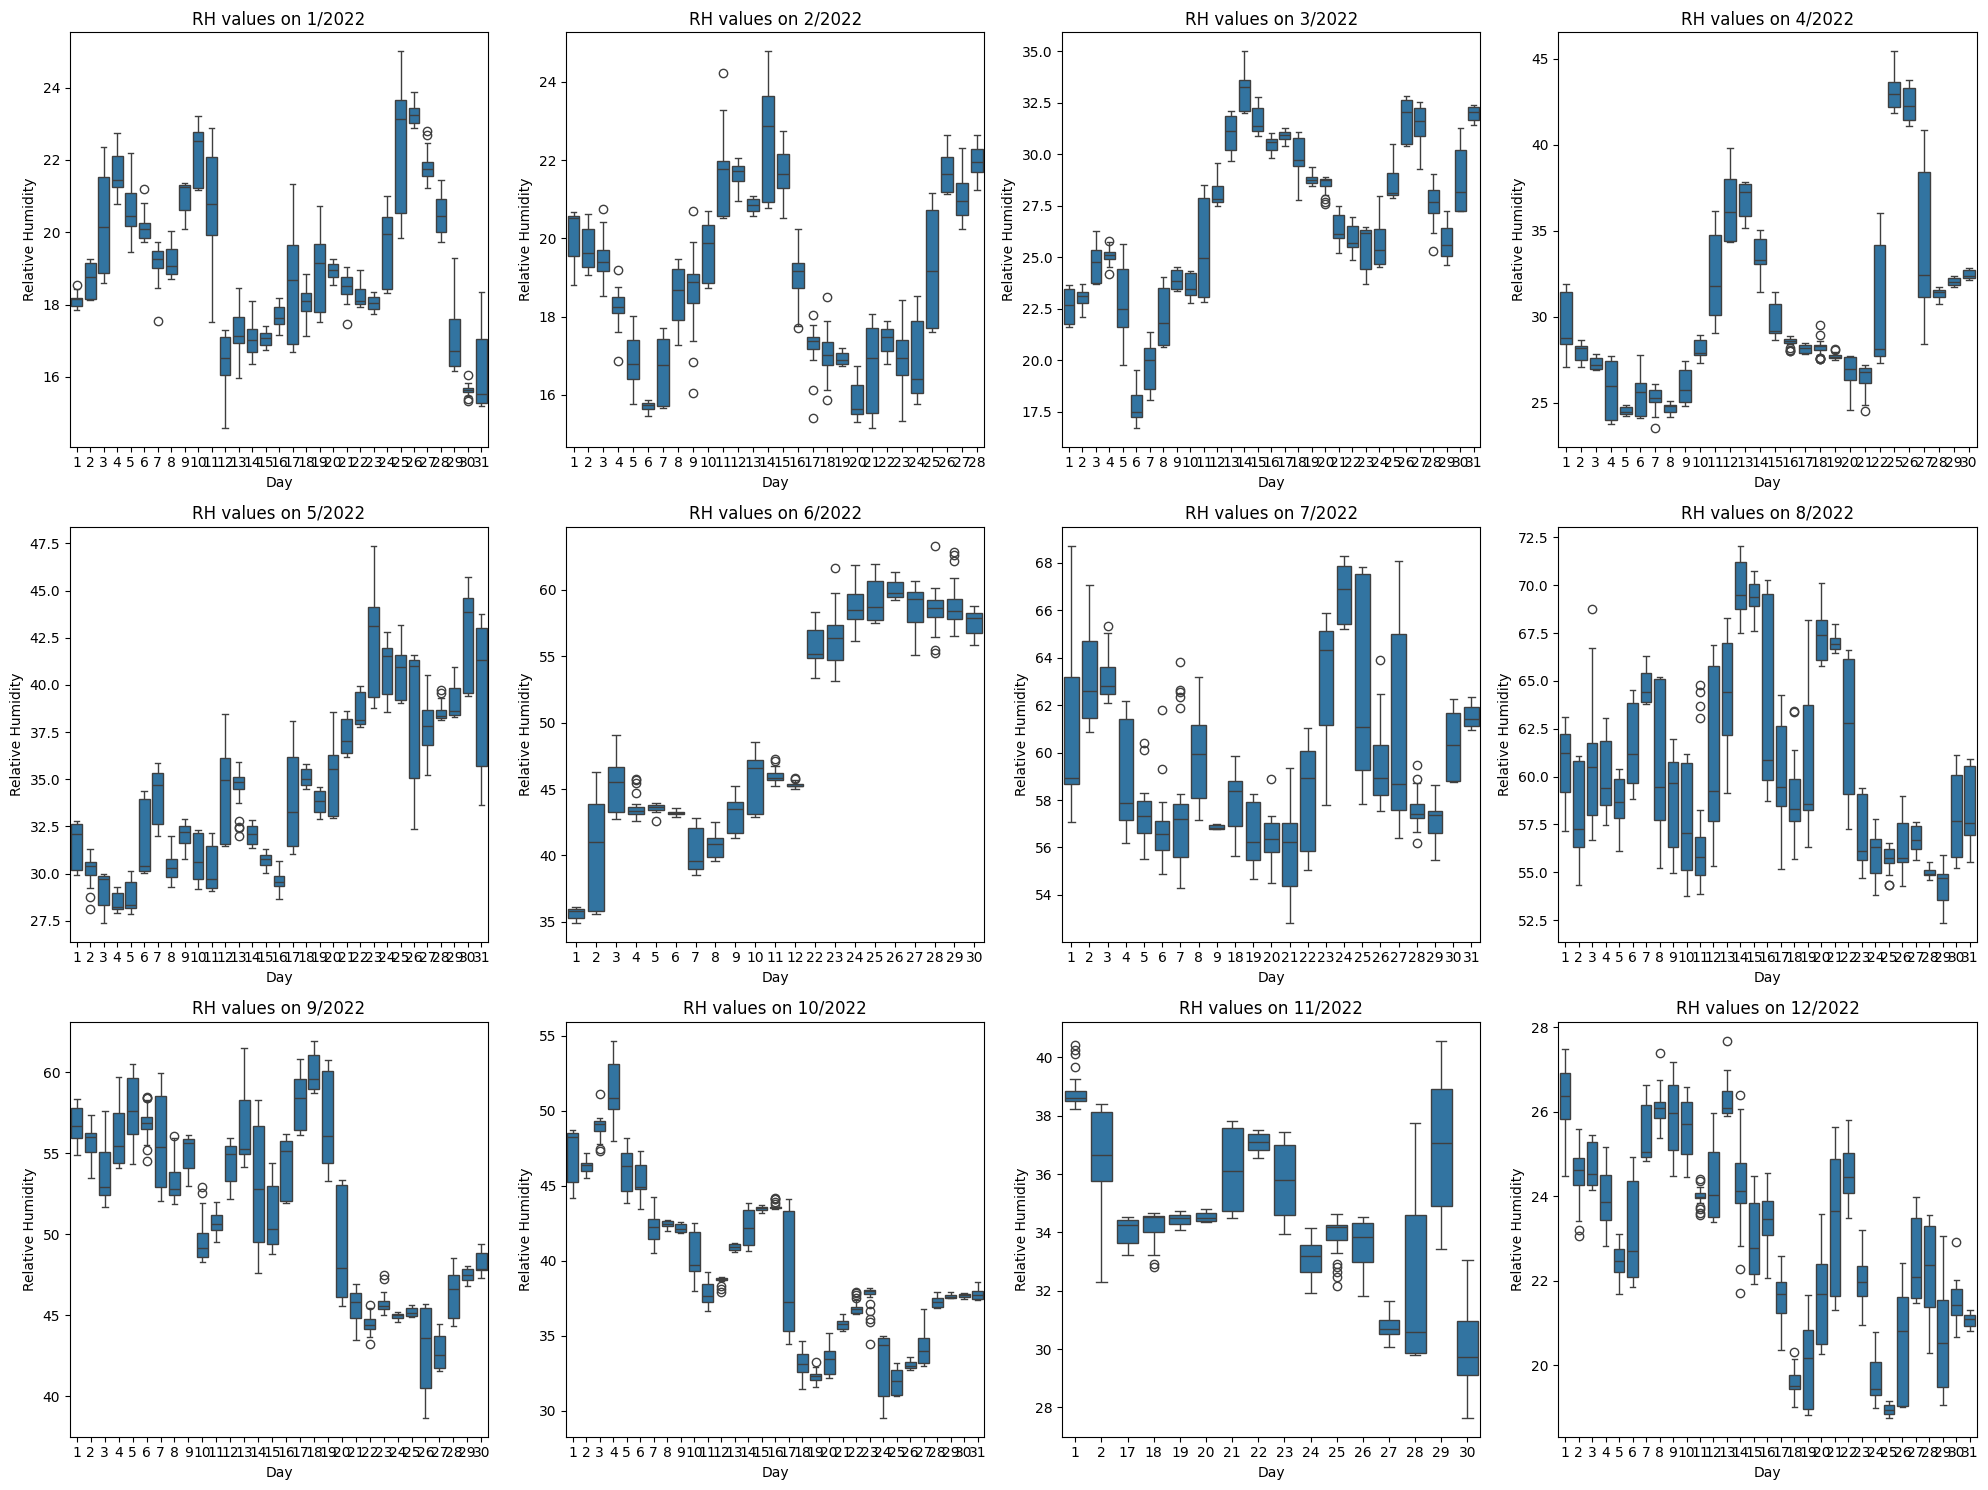

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target year
target_year = 2022

# Create a subplot grid for all months
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through each month
for month in range(1, 13):
    # Filter the data for the target month and year
    target_month_data = df[(df['Timestamp'].dt.month == month) & (df['Timestamp'].dt.year == target_year)]

    # Plot boxplots for Relative Humidity (RH)
    sns.boxplot(data=target_month_data, x="Day", y="RH", ax=axes[month-1])
    axes[month-1].set_xlabel('Day')
    axes[month-1].set_ylabel('Relative Humidity')
    axes[month-1].set_title(f'RH values on {month}/{target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


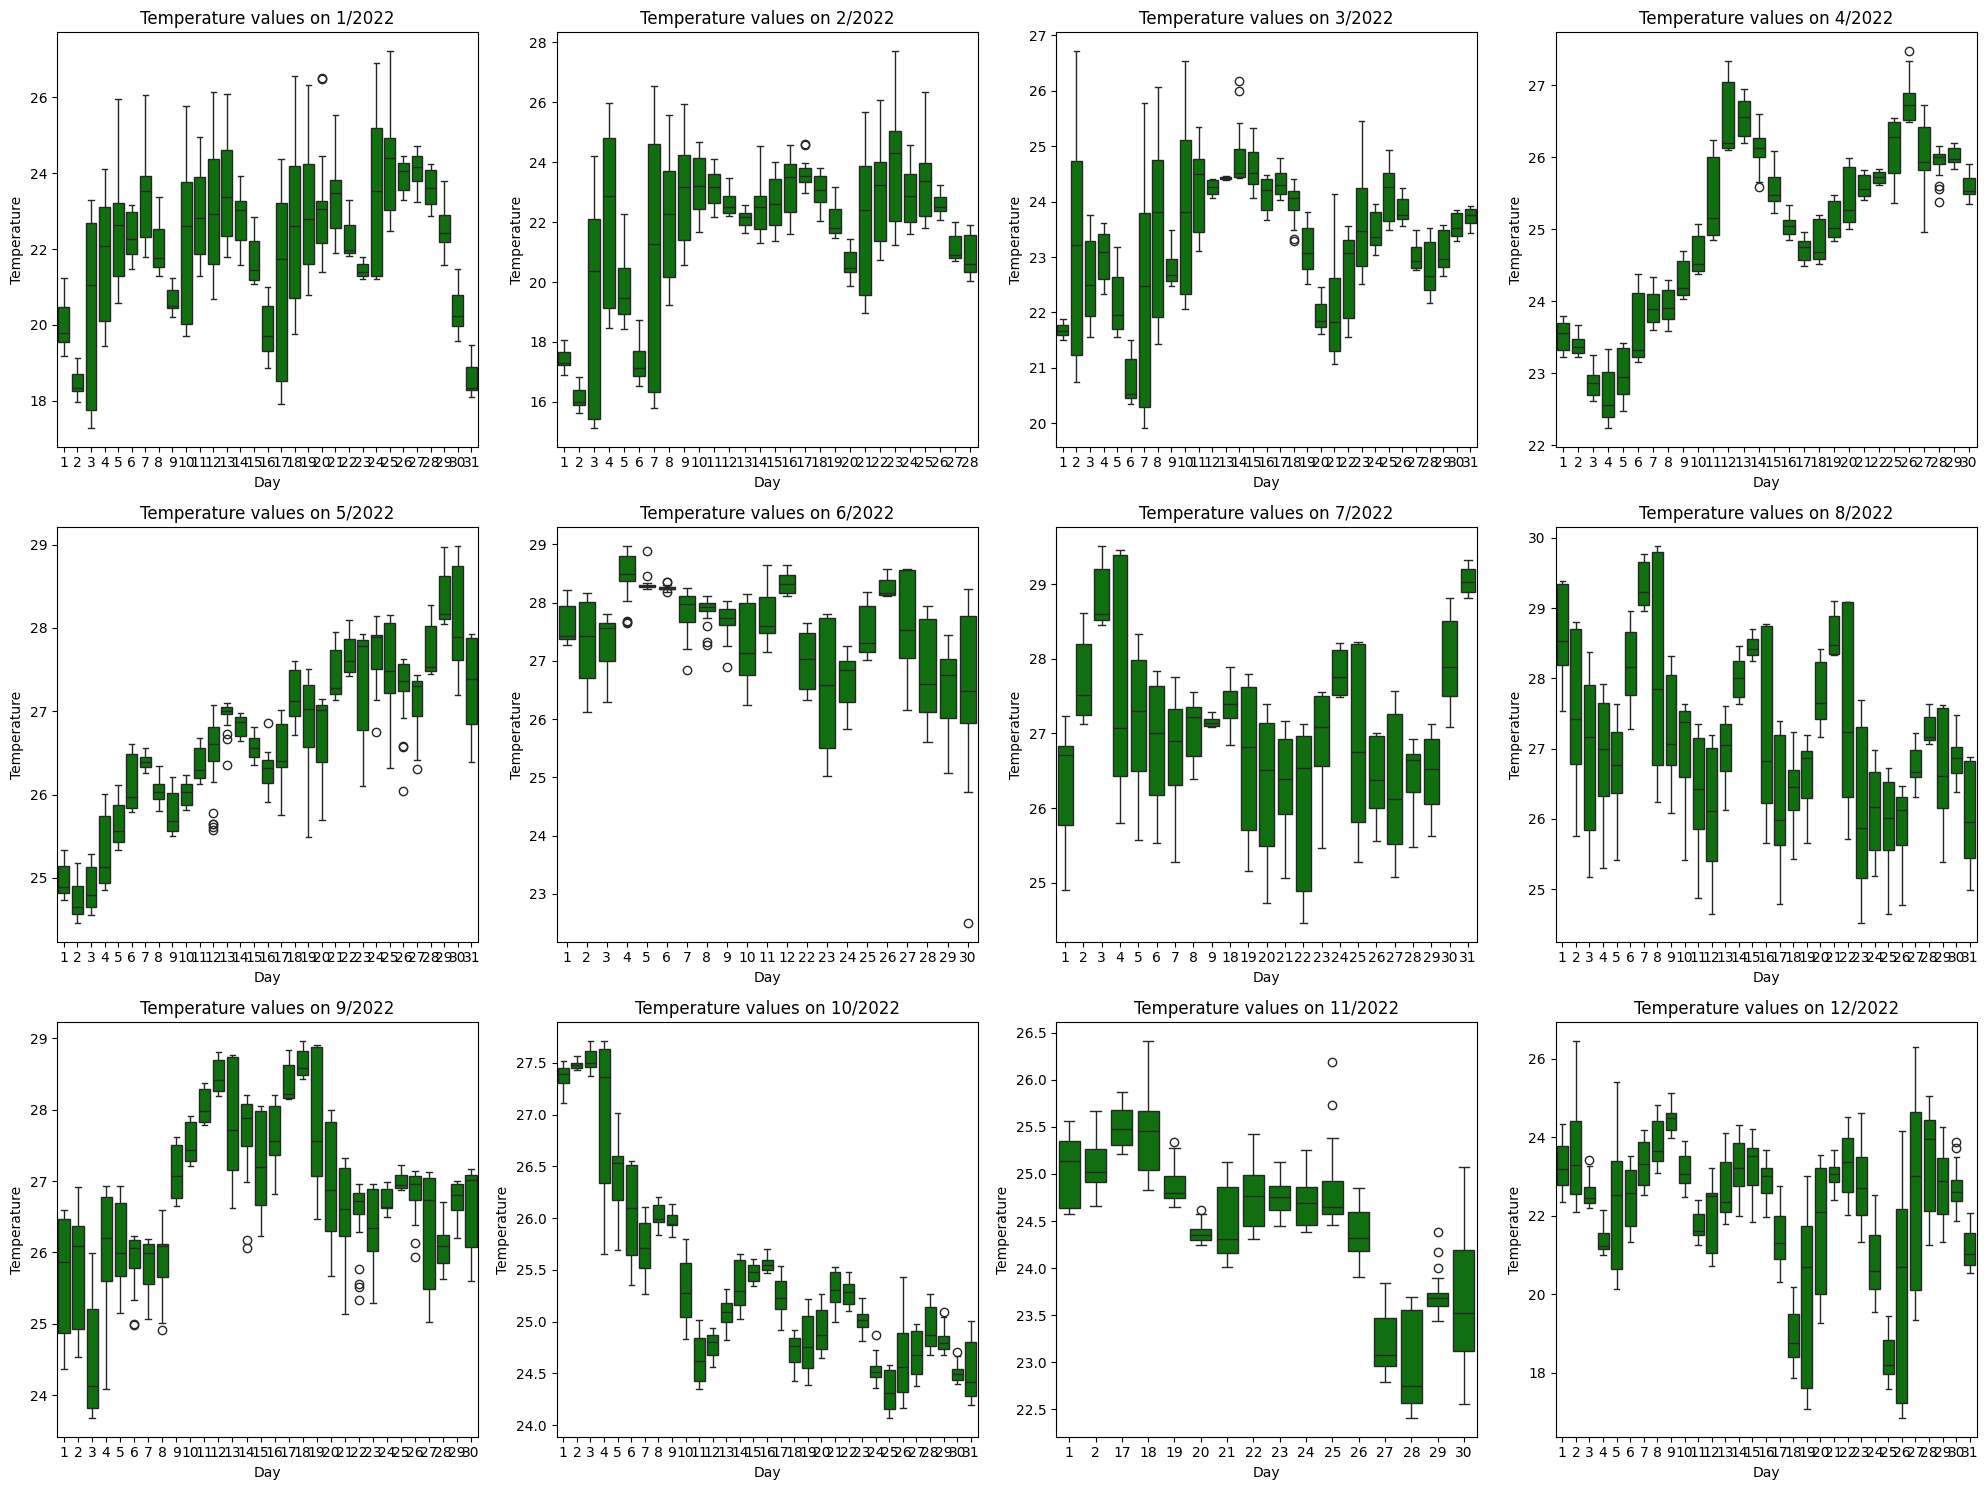

In [44]:

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target year
target_year = 2022

# Create a subplot grid for all months
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through each month
for month in range(1, 13):
    # Filter the data for the target month and year
    target_month_data = df[(df['Timestamp'].dt.month == month) & (df['Timestamp'].dt.year == target_year)]

    # Plot boxplots for Relative Humidity (RH)
    sns.boxplot(data=target_month_data, x="Day", y="Temperature", ax=axes[month-1], color='green')
    axes[month-1].set_xlabel('Day')
    axes[month-1].set_ylabel('Temperature')
    axes[month-1].set_title(f'Temperature values on {month}/{target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


The provided code generates a subplot grid with three rows and four columns, displaying boxplots for each month of the specified year (2022). Each subplot within the grid represents the distribution of Relative Humidity (RH) values for each day in the corresponding month. The x-axis of each subplot represents the days of the month, and the y-axis represents the RH values. This visualization allows for a monthly comparison of RH patterns, enabling the identification of any monthly trends, variations, or outliers in humidity levels throughout the year. By examining the boxplots collectively, one can gain insights into the seasonal or monthly dynamics of RH in the dataset for the specified year.

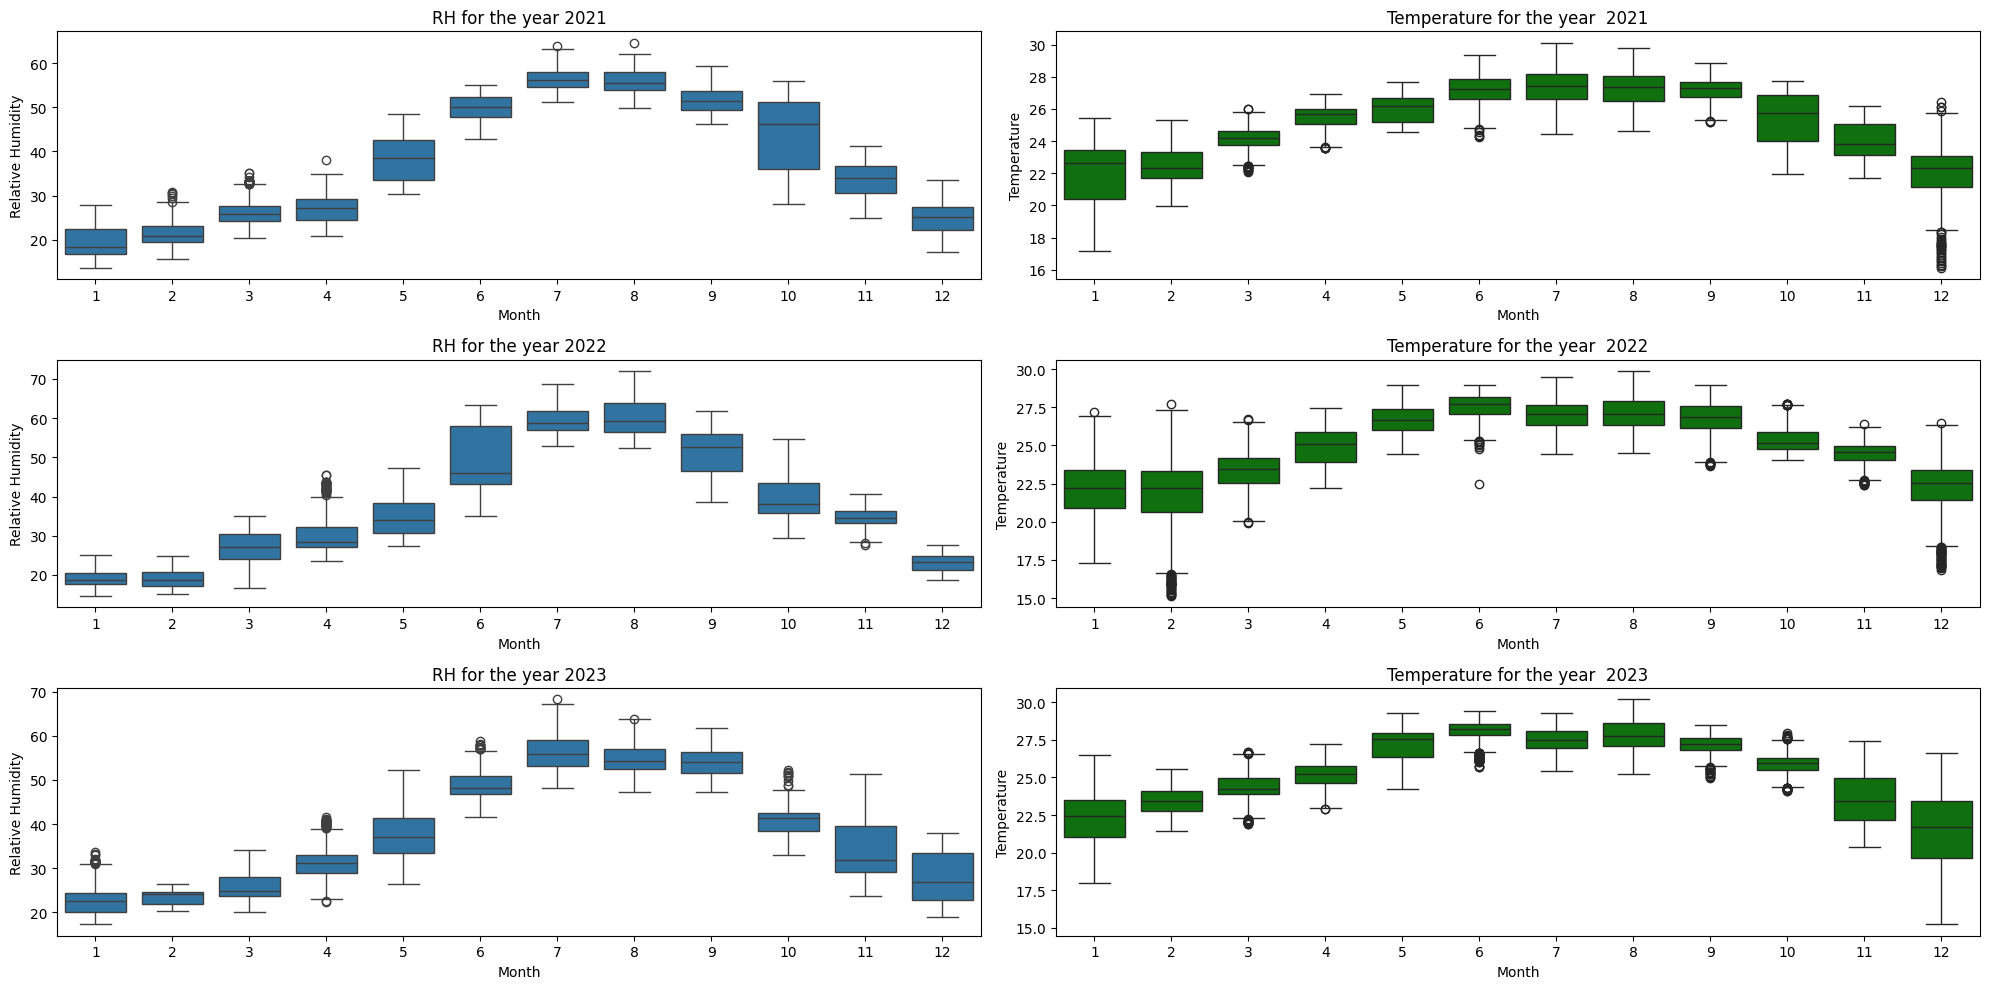

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target years
target_years = [2021, 2022, 2023]

# Create a subplot grid for all years
fig, axes = plt.subplots(nrows=len(target_years), ncols=2, figsize=(20, 10))

# Flatten the axes for easy indexing
axes = axes.flatten()

for i, target_year in enumerate(target_years):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    target_year_data = df[df['Timestamp'].dt.year == target_year].copy()

    # Extract month and day from Timestamp
    target_year_data.loc[:, 'Month'] = target_year_data['Timestamp'].dt.month

    # Boxplot for Relative Humidity (RH)
    sns.boxplot(data=target_year_data, x="Month", y="RH", ax=axes[i * 2])
    axes[i * 2].set_xlabel('Month')
    axes[i * 2].set_ylabel('Relative Humidity')
    axes[i * 2].set_title(f'RH for the year {target_year}')

    # Boxplot for Temperature
    sns.boxplot(data=target_year_data, x="Month", y="Temperature", ax=axes[i * 2 + 1], color='green')
    axes[i * 2 + 1].set_xlabel('Month')
    axes[i * 2 + 1].set_ylabel('Temperature')
    axes[i * 2 + 1].set_title(f'Temperature for the year  {target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


The provided code generates a subplot grid with rows corresponding to different target years (2021, 2022, and 2023) and columns for Relative Humidity (RH) and Temperature. Each subplot within the grid displays boxplots for the distribution of RH and Temperature values across the months of the specified target year. The x-axis of each subplot represents the months, while the y-axis represents either RH or Temperature values.

By examining the boxplots collectively, one can understand the monthly variations and patterns in both RH and Temperature for each target year. The visualization facilitates a comparison of RH and Temperature distributions across different months within each specified year. Insights into seasonality, trends, and potential outliers in RH and Temperature for the specified years can be gained through this visual analysis. Additionally, the separation of plots for each target year allows for a comparative assessment of weather patterns over the specified time periods.

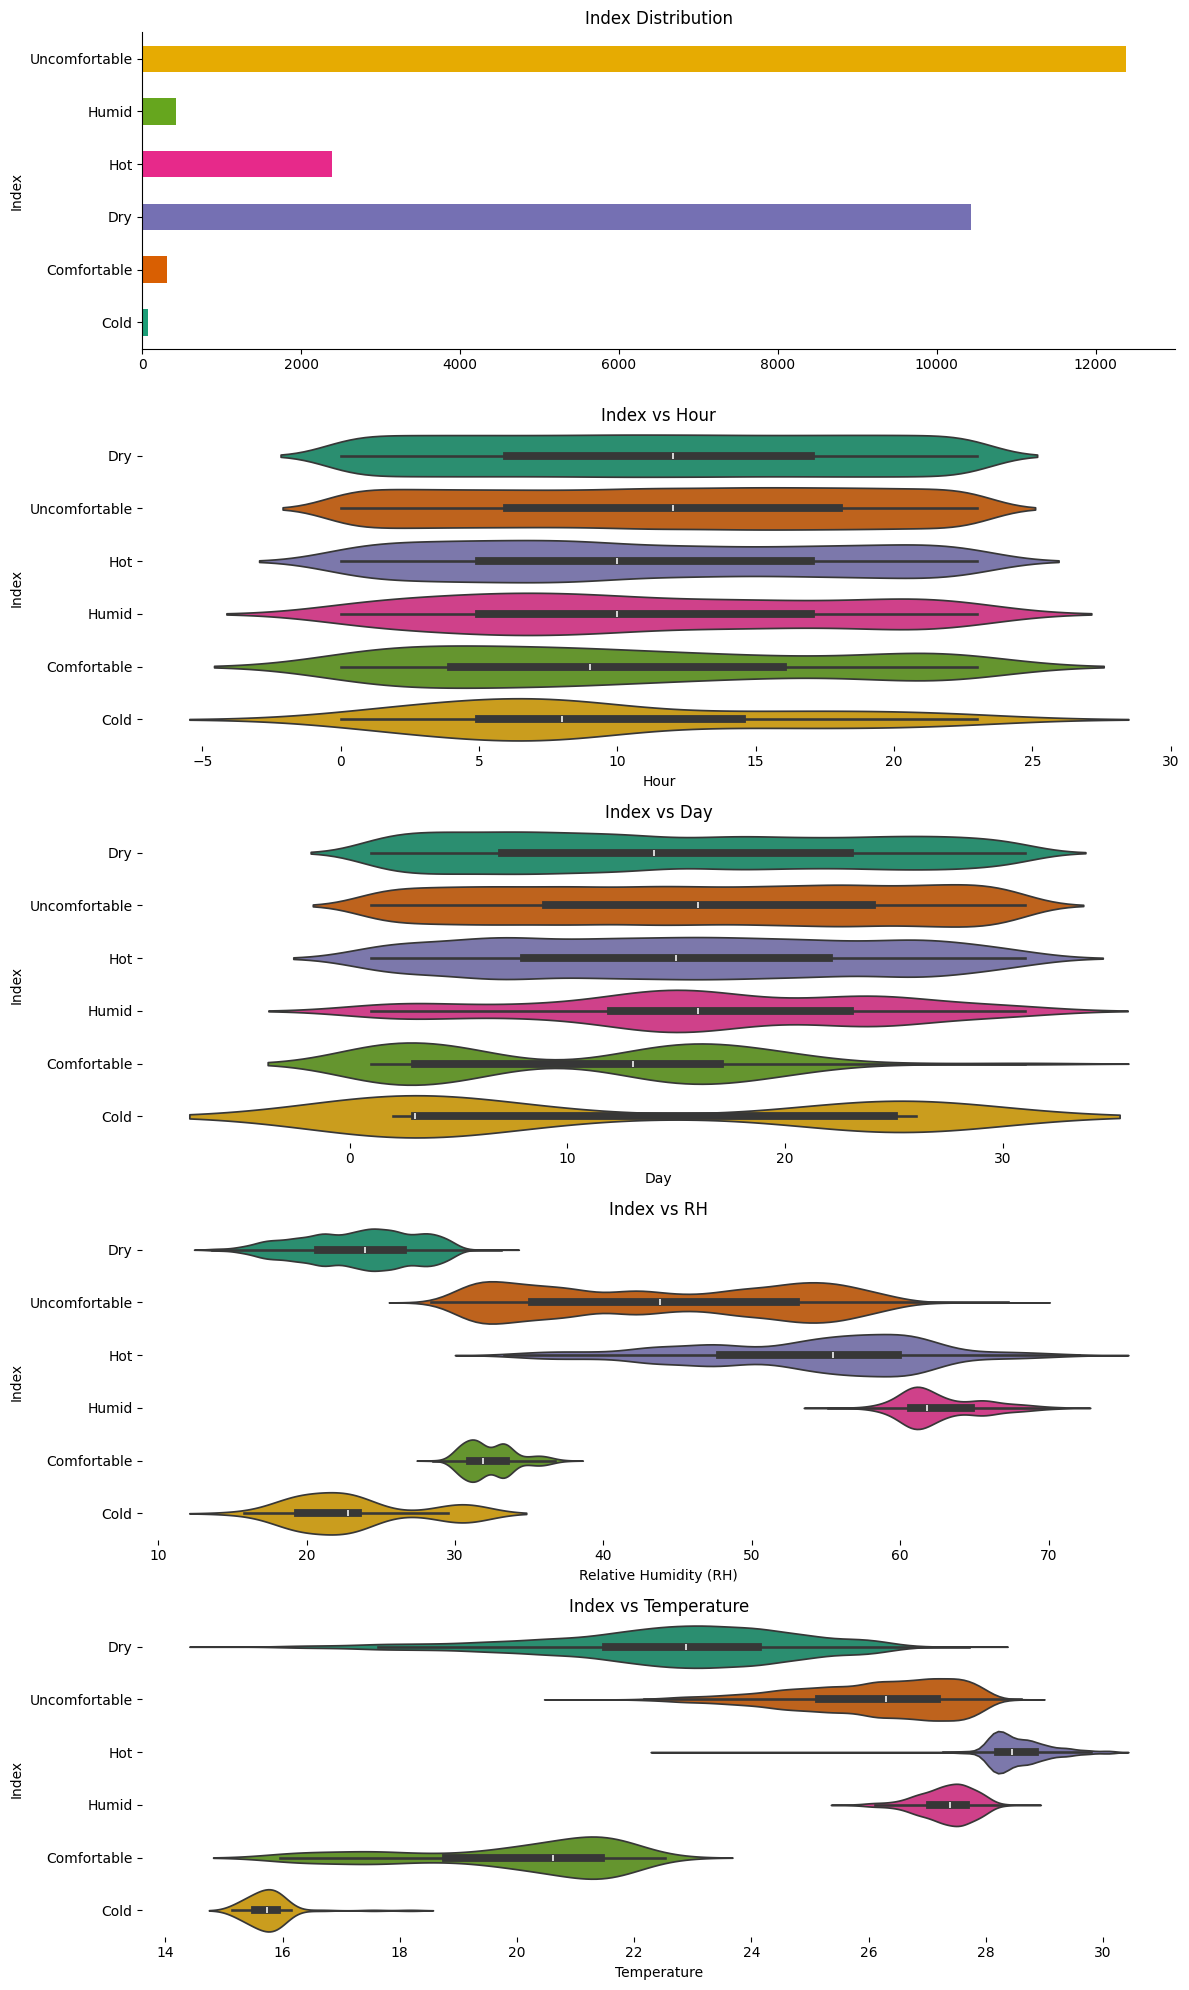

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))

# Create a custom color palette with the number of unique values in 'Index'
index_palette = sns.color_palette('Dark2', n_colors=len(df['Index'].unique()))

# Plot 1: Index distribution
df.groupby('Index').size().plot(kind='barh', color=index_palette, ax=axes[0])
axes[0].set_title('Index Distribution')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot 2: Index vs Hour
sns.violinplot(data=df, x='Hour', y='Index', inner='box', hue='Index', palette=index_palette, ax=axes[1])
axes[1].set_title('Index vs Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[1])

# Plot 3: Index vs Day
sns.violinplot(data=df, x='Day', y='Index', inner='box', hue='Index', palette=index_palette, ax=axes[2])
axes[2].set_title('Index vs Day')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[2])

# Plot 4: Index vs RH
sns.violinplot(data=df, x='RH', y='Index', inner='box', hue='Index', palette=index_palette, ax=axes[3])
axes[3].set_title('Index vs RH')
axes[3].set_xlabel('Relative Humidity (RH)')
axes[3].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[3])

# Plot 5: Index vs Temperature
sns.violinplot(data=df, x='Temperature', y='Index', inner='box', hue='Index', palette=index_palette, ax=axes[4])
axes[4].set_title('Index vs Temperature')
axes[4].set_xlabel('Temperature')
axes[4].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[4])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()






Index Distribution (Plot 1): The first plot is a horizontal bar chart displaying the distribution of different index values. Each unique index is represented by a distinct color from a custom color palette. This plot provides insights into the frequency or count of each index category in the dataset.

Index vs Hour (Plot 2): The second plot is a violin plot showing the relationship between the 'Index' and the 'Hour' of the day. Each index has a separate distribution, allowing observation of how the distribution of the index values varies across different hours. The spread and shape of the violins reveal patterns or variations in index values at different times of the day.

Index vs Day (Plot 3): Similar to Plot 2, this plot shows the relationship between 'Index' and 'Day.' Each index has its own violin plot, providing insights into how the distribution of index values changes across different days. It helps identify any daily patterns or variations in index values.

Index vs RH (Plot 4): This plot represents the relationship between 'Index' and 'Relative Humidity (RH)' using violin plots. Each index category has a separate distribution, revealing variations in index values concerning relative humidity. It helps in understanding how index values correlate with humidity levels.

Index vs Temperature (Plot 5): The final plot depicts the relationship between 'Index' and 'Temperature.' Violin plots for each index category show how index values are distributed across different temperature ranges. This plot aids in understanding the correlation between index values and temperature.

In summary, the combined plots offer a comprehensive exploration of the 'Index' variable, providing insights into its distribution, variations with time (hour and day), and relationships with key weather-related features such as RH and Temperature.







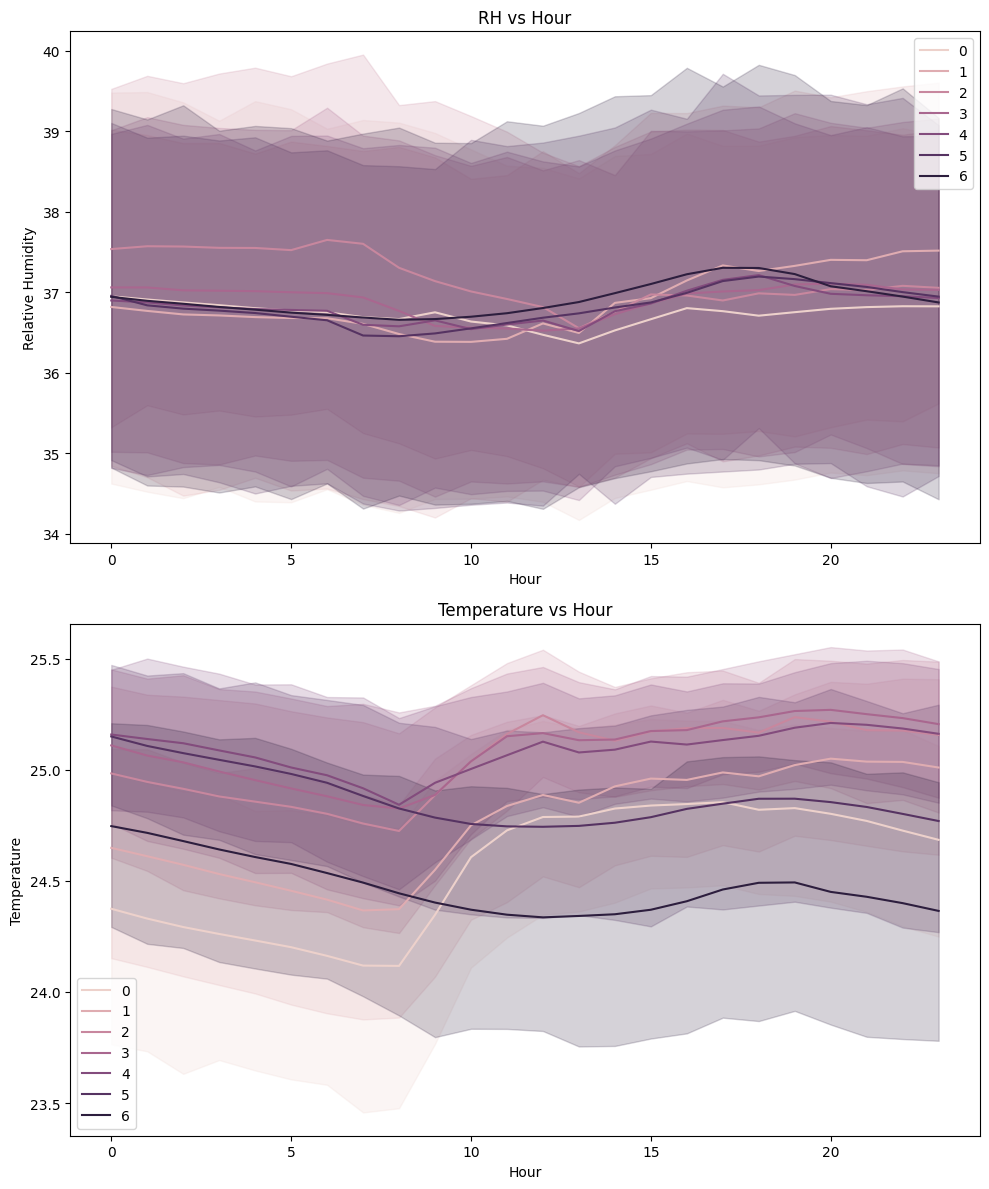

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot RH vs Hour
sns.lineplot(data=df, x="Hour", y="RH", hue="DayOfWeek", ax=axes[0])
axes[0].set_title("RH vs Hour")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Relative Humidity")
axes[0].legend()

# Plot Temperature vs Hour
sns.lineplot(data=df, x="Hour", y="Temperature", hue="DayOfWeek", ax=axes[1])
axes[1].set_title("Temperature vs Hour")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Temperature")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


The provided code generates two subplots to visualize the relationship between 'Relative Humidity (RH)' and 'Temperature' with respect to the 'Hour' of the day, differentiated by different days of the week. Here's what we can understand from each plot:

RH vs Hour (Plot 1): The first subplot displays a line plot depicting the variation of 'Relative Humidity' throughout the day ('Hour'). Different lines represent different days of the week ('DayOfWeek'), as indicated by the legend. This plot helps in understanding how relative humidity changes during different hours of the day across various days of the week. Patterns or trends in the lines can provide insights into the daily variations in humidity.

Temperature vs Hour (Plot 2): The second subplot is similar to the first but focuses on 'Temperature.' It illustrates how temperature changes across different hours of the day, and each line represents a specific day of the week. This plot allows for the observation of temperature trends and variations throughout the day and how they differ on different days of the week.

In summary, the combined plots provide a visual representation of the diurnal patterns of 'Relative Humidity' and 'Temperature' with variations across different days of the week. The legends help identify which line corresponds to each day, facilitating the interpretation of patterns and trends in both humidity and temperature data.

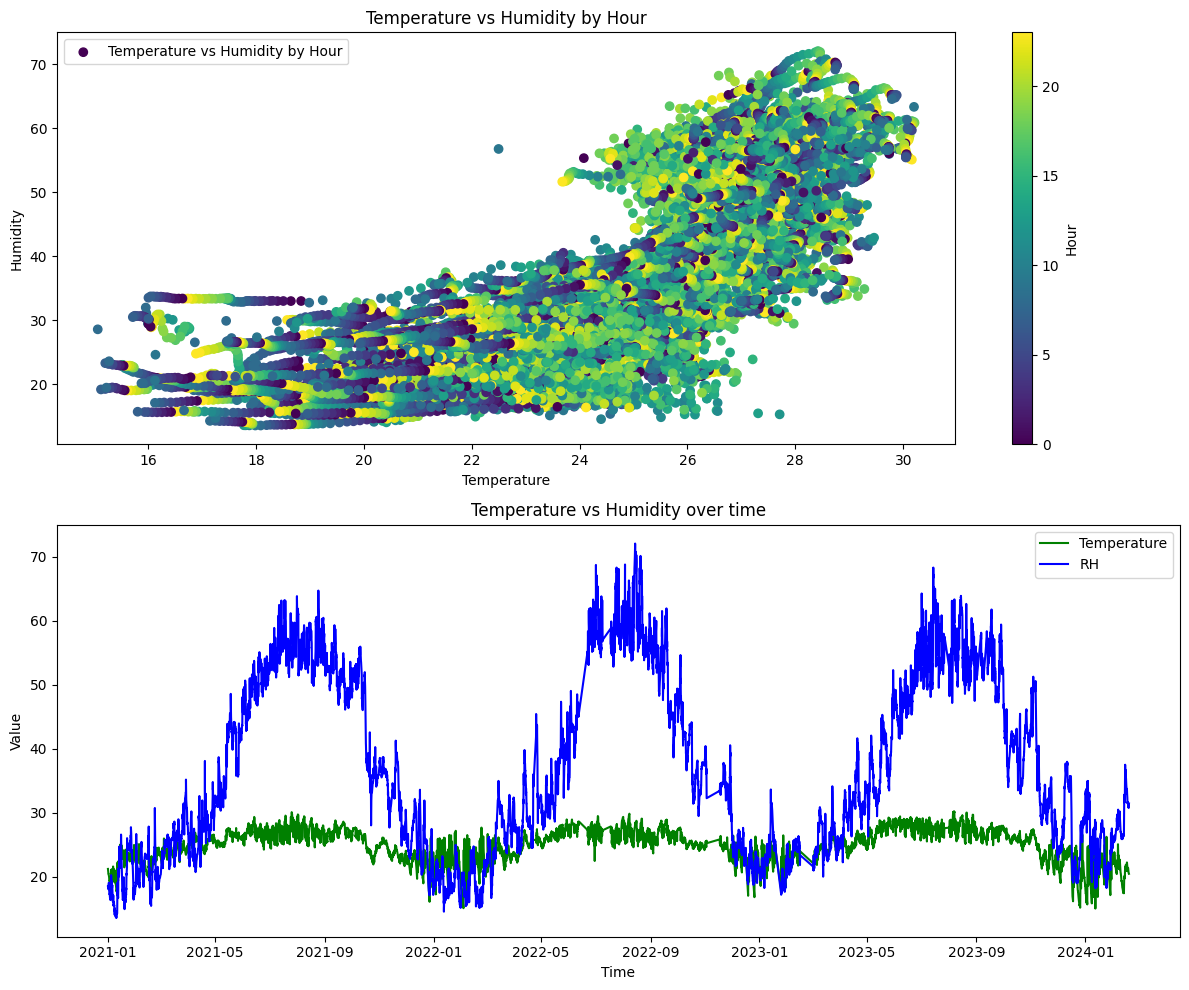

In [17]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot Temperature vs Humidity by Hour
scatter = axes[0].scatter(df['Temperature'], df['RH'], c=df['Hour'], label='Temperature vs Humidity by Hour')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Humidity')
axes[0].set_title('Temperature vs Humidity by Hour')
axes[0].legend()

# Add colorbar for the Hour values
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Hour')

# Plot Temperature vs Humidity over time
axes[1].plot(df['Timestamp'], df['Temperature'], color='green', label='Temperature')
axes[1].plot(df['Timestamp'], df['RH'], color='blue', label='RH')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Value')
axes[1].set_title('Temperature vs Humidity over time')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()




The provided code creates two subplots to visualize the relationship between 'Temperature' and 'Humidity' in different ways:

Temperature vs Humidity by Hour (Scatter Plot): The first subplot displays a scatter plot where each point represents a combination of 'Temperature' and 'Humidity,' and the color of the points indicates the corresponding 'Hour.' This plot helps observe the relationship between temperature and humidity at different hours of the day. The legend and colorbar assist in interpreting the plot, associating colors with specific hours.

Temperature vs Humidity over time (Line Plot): The second subplot depicts the variation of 'Temperature' (in blue) and 'Relative Humidity (RH)' (in green) over time. This line plot provides a continuous view of temperature and humidity changes throughout the recorded time. The legend distinguishes between temperature and RH, and the x-axis represents the timestamp or time.

In summary, these plots allow us to understand how 'Temperature' and 'Humidity' relate to each other during different hours of the day (via scatter plot) and how they evolve over time (via line plot). The color-coded representation in the first plot aids in identifying patterns corresponding to different hours, while the second plot provides a continuous temporal perspective on the two variables.

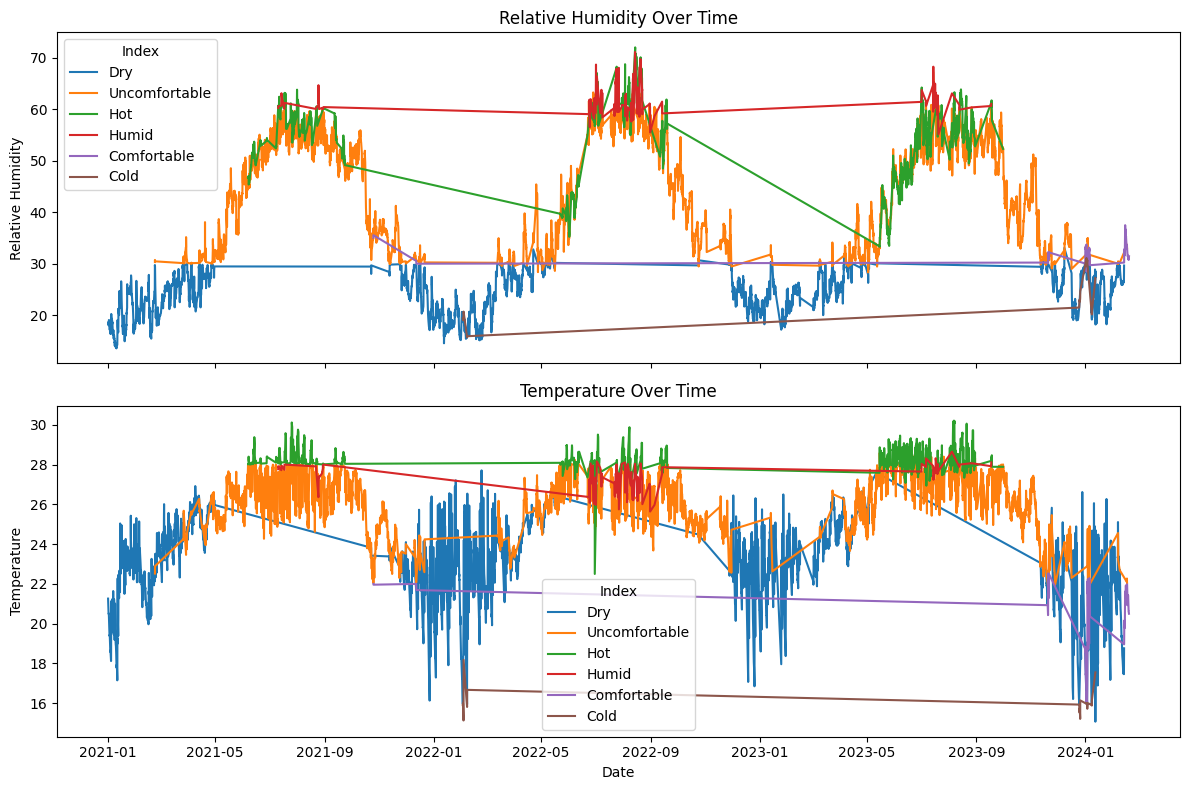

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has a datetime index
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Line plot for Relative Humidity (RH)
sns.lineplot(data=df, x=df.index, y='RH', hue='Index', ax=axes[0])
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title('Relative Humidity Over Time')
axes[0].legend(title='Index')

# Line plot for Temperature
sns.lineplot(data=df, x=df.index, y='Temperature', hue='Index', ax=axes[1])
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Temperature Over Time')
axes[1].legend(title='Index')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()





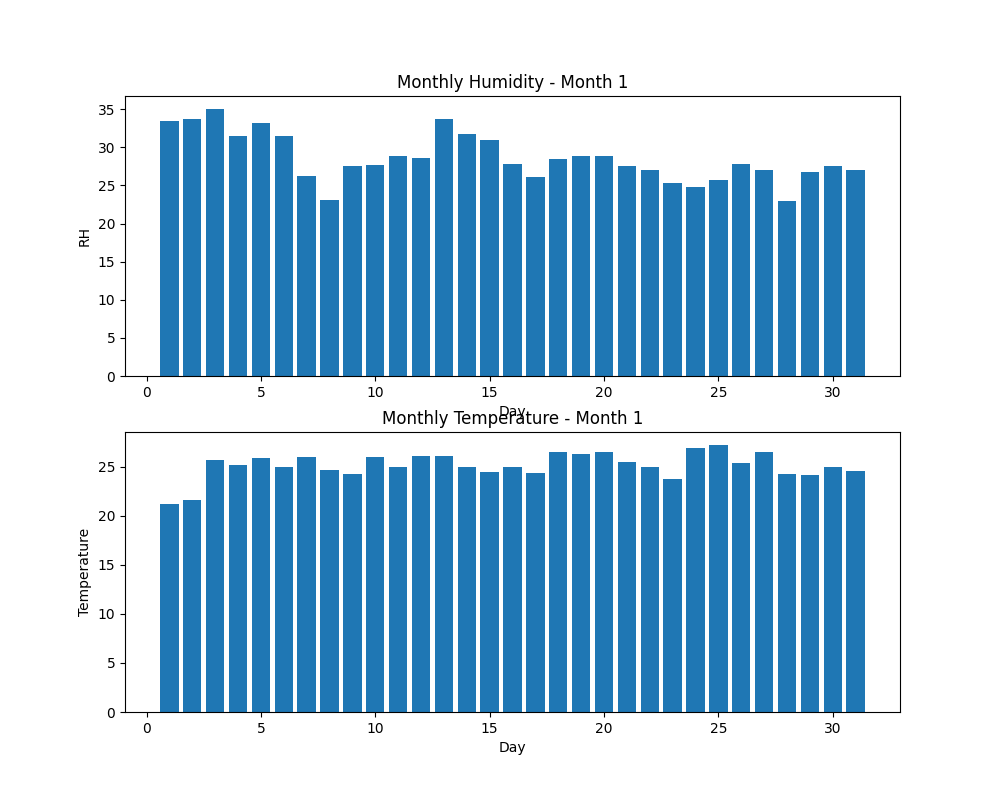

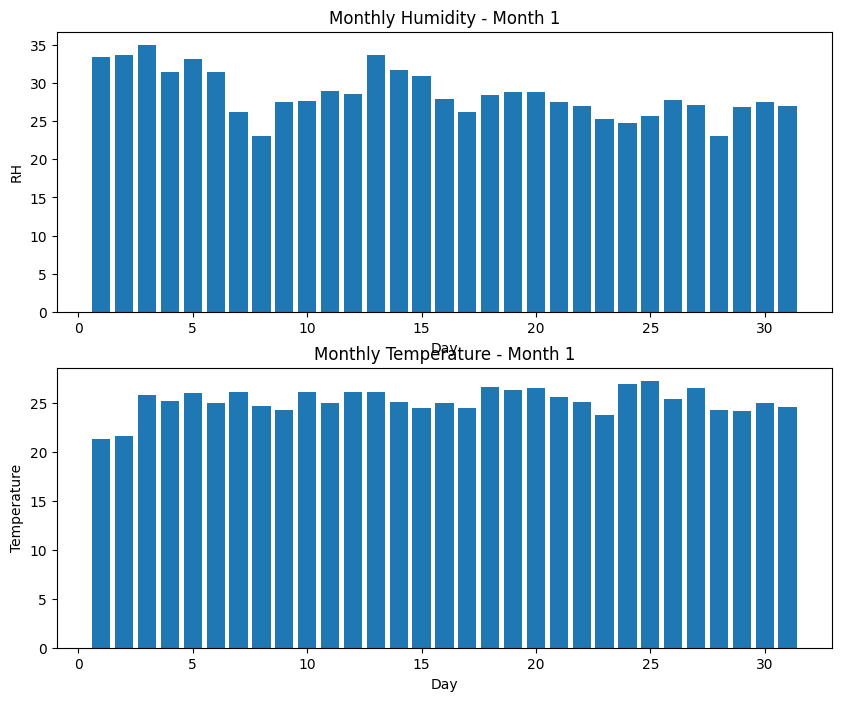

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Assuming your DataFrame is named df and has a 'Timestamp' column
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Extract month from Timestamp
df['Month'] = df['Timestamp'].dt.month

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Set up initial empty bar plots
bar_plot_rh = axes[0].bar([], [])
bar_plot_temp = axes[1].bar([], [])

# Set labels and titles
axes[0].set_title('Monthly Humidity')
axes[1].set_title('Monthly Temperature')

# Function to update the bar plots for each frame
def update(frame):
    # Clear previous bar plots
    axes[0].cla()
    axes[1].cla()

    # Filter data for the current month
    current_month_data = df[df['Month'] == frame + 1]

    # Update bar plots for RH
    bar_plot_rh = axes[0].bar(current_month_data['Day'], current_month_data['RH'])
    axes[0].set_xlabel('Day')
    axes[0].set_ylabel('RH')

    # Update bar plots for Temperature
    bar_plot_temp = axes[1].bar(current_month_data['Day'], current_month_data['Temperature'])
    axes[1].set_xlabel('Day')
    axes[1].set_ylabel('Temperature')

    # Set labels and titles
    axes[0].set_title(f'Monthly Humidity - Month {frame + 1}')
    axes[1].set_title(f'Monthly Temperature - Month {frame + 1}')

# Create an animation
animation = FuncAnimation(fig, update, frames=12, interval=1000, repeat=False)

# Save the animation as a GIF using Pillow
animation.save('monthly_animation.gif')

# Display the saved GIF
Image(filename='monthly_animation.gif')


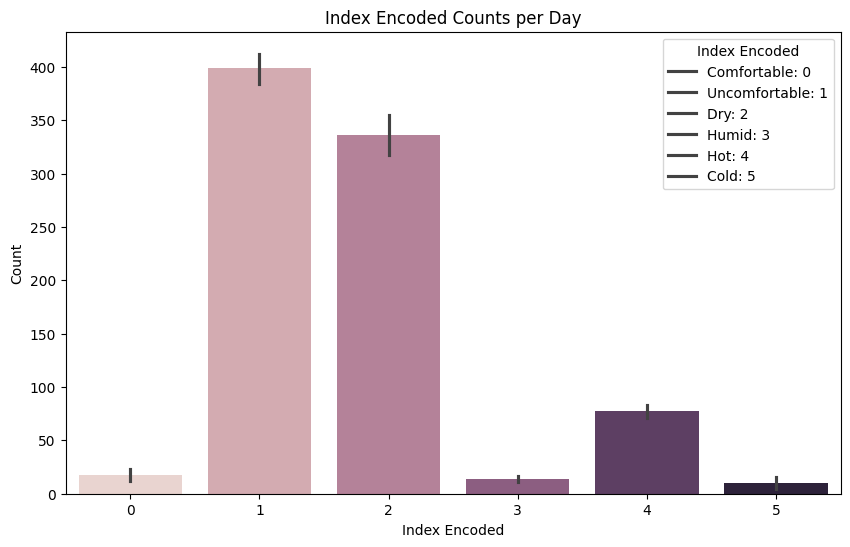

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Define the label mapping
label_mapping = {'Comfortable': 0, 'Uncomfortable': 1, 'Dry': 2, 'Humid': 3, 'Hot': 4, 'Cold': 5}

# Map the labels to Index_encoded
df['Index_encoded'] = df['Index'].map(label_mapping)

# Group data by day and index, then count occurrences
index_counts_per_day = df.groupby(['Day', 'Index_encoded']).size().reset_index(name='Count')

# Create a bar plot using seaborn with hue for labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Index_encoded', y='Count', hue='Index_encoded', data=index_counts_per_day)

# Set custom legend labels
legend_labels = [f'{key}: {value}' for key, value in label_mapping.items()]
plt.legend(title='Index Encoded', labels=legend_labels)

plt.title('Index Encoded Counts per Day')
plt.xlabel('Index Encoded')
plt.ylabel('Count')

# Show the plot
plt.show()


<ipython-input-81-36e74b05b11e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='index', y='Count', data=index_counts, palette=colors)


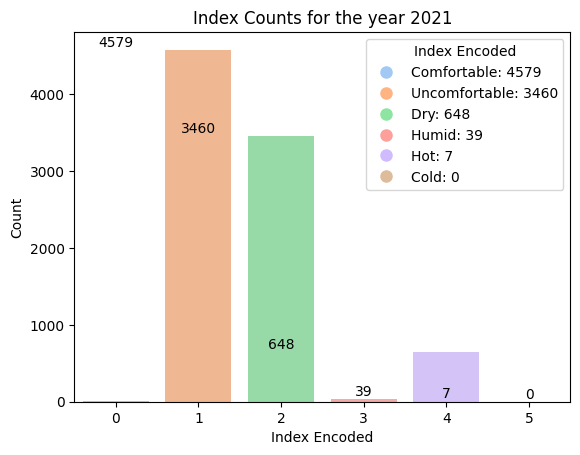

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target year
target_year = 2021

# Define the label mapping
label_mapping = {'Comfortable': 0, 'Uncomfortable': 1, 'Dry': 2, 'Humid': 3, 'Hot': 4, 'Cold': 5}
labels = list(label_mapping.keys())

# Create a copy of the DataFrame for the target year
target_year_data = df[df['Timestamp'].dt.year == target_year].copy()

# Map the labels to Index_encoded
target_year_data['Index_encoded'] = target_year_data['Index'].map(label_mapping)

# Ensure that all indices are included in the plot
all_indices = list(label_mapping.values())
target_year_data['Index_encoded'] = target_year_data['Index_encoded'].astype(pd.CategoricalDtype(categories=all_indices, ordered=True))

# Group data by Index_encoded and count occurrences
index_counts = target_year_data['Index_encoded'].value_counts().reset_index(name='Count')

# Define colors for each category
colors = sns.color_palette("pastel", len(label_mapping))

# Ensure that the number of unique values matches the length of the colors palette
num_unique_values = len(index_counts['index'].unique())
if num_unique_values > len(colors):
    colors = sns.color_palette("pastel", num_unique_values)

# Create a bar chart for Index_encoded value counts with specified colors
ax = sns.barplot(x='index', y='Count', data=index_counts, palette=colors)

# Add labels on top of the bars
for index, count in enumerate(index_counts['Count']):
    ax.text(index, count + 0.1, str(count), ha='center', va='bottom')

# Custom legend with colored swatches
legend_labels = [f'{label}: {count}' for label, count in zip(labels, index_counts['Count'])]
legend_handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=8) for color in colors]

ax.legend(legend_handles, legend_labels, title='Index Encoded')

plt.title(f'Index Counts for the year {target_year}')
plt.xlabel('Index Encoded')
plt.ylabel('Count')

# Show the plot
plt.show()


<ipython-input-84-d5fd311fe6e9>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='Count', data=index_counts, palette=colors, ax=axes[i])
<ipython-input-84-d5fd311fe6e9>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='Count', data=index_counts, palette=colors, ax=axes[i])
<ipython-input-84-d5fd311fe6e9>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='Count', data=index_counts, palette=colors, ax=axes[i])


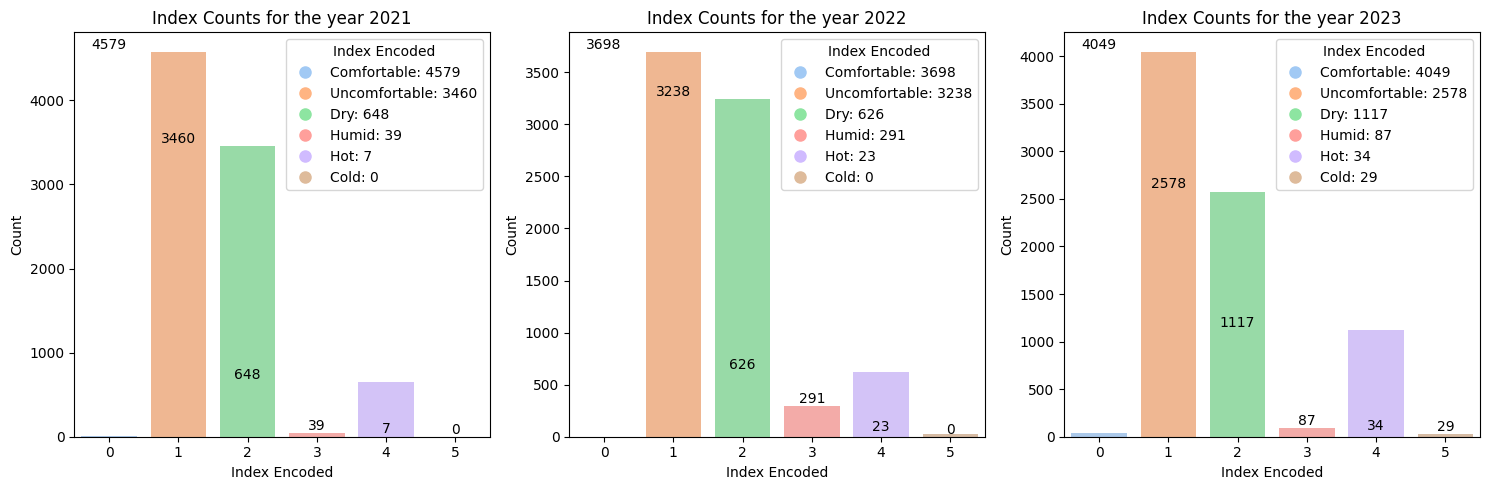

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target years
target_years = [2021, 2022, 2023]

# Define the label mapping
label_mapping = {'Comfortable': 0, 'Uncomfortable': 1, 'Dry': 2, 'Humid': 3, 'Hot': 4, 'Cold': 5}
labels = list(label_mapping.keys())

# Create a subplot grid for all years
fig, axes = plt.subplots(nrows=1, ncols=len(target_years), figsize=(15, 5))

for i, target_year in enumerate(target_years):
    # Create a copy of the DataFrame for the target year
    target_year_data = df[df['Timestamp'].dt.year == target_year].copy()

    # Map the labels to Index_encoded
    target_year_data['Index_encoded'] = target_year_data['Index'].map(label_mapping)

    # Ensure that all indices are included in the plot
    all_indices = list(label_mapping.values())
    target_year_data['Index_encoded'] = target_year_data['Index_encoded'].astype(pd.CategoricalDtype(categories=all_indices, ordered=True))

    # Group data by Index_encoded and count occurrences
    index_counts = target_year_data['Index_encoded'].value_counts().reset_index(name='Count')

    # Define colors for each category
    colors = sns.color_palette("pastel", len(label_mapping))

    # Ensure that the number of unique values matches the length of the colors palette
    num_unique_values = len(index_counts['index'].unique())
    if num_unique_values > len(colors):
        colors = sns.color_palette("pastel", num_unique_values)

    # Create a bar chart for Index_encoded value counts with specified colors
    sns.barplot(x='index', y='Count', data=index_counts, palette=colors, ax=axes[i])

    # Add labels on top of the bars
    for index, count in enumerate(index_counts['Count']):
        axes[i].text(index, count + 0.1, str(count), ha='center', va='bottom')

    # Custom legend with colored swatches
    legend_labels = [f'{label}: {count}' for label, count in zip(labels, index_counts['Count'])]
    legend_handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=8) for color in colors]

    axes[i].legend(legend_handles, legend_labels, title='Index Encoded')

    axes[i].set_title(f'Index Counts for the year {target_year}')
    axes[i].set_xlabel('Index Encoded')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
